<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/DensityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Density Estimation: It is inbetween unsupervised learning , feature engg, data modeling
- Gaussian Mixure Model
- Neighbor Density
"""



In [0]:
"""
Kernel Density Estimation: 

It applies a kernel to each data point x rendering its distribution. Kernel is a 
positive function K(x; h). Given this kernel form, the density estimate at a point y
is given as 

 p_k(y) = i = Sum of N  { K ((y - x_i) /h) }
"""

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
from scipy.stats import norm

import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)

kde_score = kde.score_samples(X)
kde_score

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

In [0]:
"""
Kernel Density Estimation:
"""

import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import gzip


In [16]:
!mkdir fashion
% cd fashion

/content/fashion


In [0]:
!rm -rf *

In [31]:
!wget https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-labels-idx1-ubyte.gz?raw=true
!wget https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz?raw=true
!wget https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-labels-idx1-ubyte.gz?raw=true
!wget https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-images-idx3-ubyte.gz?raw=true

--2019-06-08 02:12:27--  https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-labels-idx1-ubyte.gz?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz [following]
--2019-06-08 02:12:27--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz [following]
--2019-06-08 02:12:27--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.1

In [32]:
!ls -l

total 30164
-rw-r--r-- 1 root root  4422102 Jun  8 02:12 't10k-images-idx3-ubyte.gz?raw=true'
-rw-r--r-- 1 root root     5148 Jun  8 02:12 't10k-labels-idx1-ubyte.gz?raw=true'
-rw-r--r-- 1 root root 26421880 Jun  8 02:12 'train-images-idx3-ubyte.gz?raw=true'
-rw-r--r-- 1 root root    29515 Jun  8 02:12 'train-labels-idx1-ubyte.gz?raw=true'


In [0]:
filePath_train_set = "/content/fashion/train-images-idx3-ubyte.gz?raw=true"
filePath_train_label = "/content/fashion/train-labels-idx1-ubyte.gz?raw=true"

filePath_test_set = "/content/fashion/t10k-images-idx3-ubyte.gz?raw=true"
filePath_test_label = "/content/fashion/t10k-labels-idx1-ubyte.gz?raw=true"



In [34]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print("Type Label ", type(testLabel))

print("Train Image Shape", trainSet.shape)

print("Train Label Shape", trainLabel.shape)

print("Test Image Shape", testSet.shape)

print("Test Label Shape", testLabel.shape)


Type Label  <class 'numpy.ndarray'>
Train Image Shape (60000, 784)
Train Label Shape (60000,)
Test Image Shape (10000, 784)
Test Label Shape (10000,)


In [0]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

In [0]:
pca = PCA(n_components=200, whiten=False).fit(X_train)


In [41]:
pca.explained_variance_ratio_.sum()

0.9531810389364863

In [0]:
X_train_pca = pca.transform(X_train)

In [0]:
X_test = pca.transform(X_test)

In [46]:
params = { 'bandwidth': np.logspace(-1, 1, 20)}

grid = GridSearchCV(KernelDensity(), params, iid=False)
grid.fit(X_train_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid=False, n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
print("best parameters {0}".format(grid.best_estimator_.bandwidth))

kde = grid.best_estimator_

best parameters 10.0


In [0]:
new_fashion_mnist_images = kde.sample(44, random_state=42)

new_fashion_mnist_images = pca.inverse_transform(new_fashion_mnist_images)

In [0]:
new_fashion_mnist_images = new_fashion_mnist_images.reshape((4, 11, -1))
real_fashion_mnist_image = X_train[200:244].reshape((4, 11, -1))

Text(0.5, 1.0, 'Drawn From KDE Distribution')

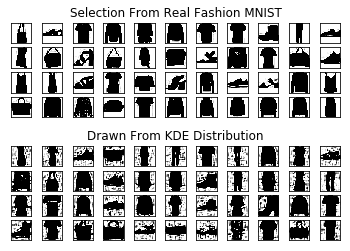

In [54]:
fig, ax = plt.subplots(9 , 11, subplot_kw=dict(xticks=[], yticks=[]))

for j in range(11):
  ax[4, j].set_visible(False)
  for i in range(4):
    im = ax[i, j].imshow(real_fashion_mnist_image[i, j].reshape((28, 28)),
                             cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(0, 16)
    im = ax[i + 5, j].imshow(new_fashion_mnist_images[i, j].reshape((28, 28)),
                                 cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(0, 16)
    
ax[0, 5].set_title("Selection From Real Fashion MNIST")
ax[5, 5].set_title("Drawn From KDE Distribution")